# Feature Engineering and Preprocessing

In this section, I will do the following:
1. Simple encode important categorical features
2. Further re-categorize features that can do one-hot encoding
    * Group flat_model, flat_model, full_flat_type into flat_type
    * Group towns into regions, and remove postal, and planning_area, mrt_name as redundant features
3. Perform one-hot encoding on selected categorical features
4. Introduce interaction terms for sec_sch_nearest_distance and cutoff point
5. Scale predicted variable (resale_price) into a normal distribution

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('../datasets/clean_data.csv') 

In [63]:
df_pred = pd.read_csv('../datasets/clean_pred_data.csv') 

In [64]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,mid,full_flat_type,hdb_age,year_completed,residential,commercial,market_hawker,multistorey_carpark,total_dwelling_units,postal,planning_area,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,mrt_name,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,cutoff_point,remaining_lease_years
0,0,KALLANG/WHAMPOA,4 ROOM,90.0,Model A,2006,680000.0,2016,11,4 ROOM Model A,15,2005,Y,N,N,N,142,382003,Kallang,1094.090418,154.753357,330.083069,Kallang,29.427395,1138.633422,1138.633422,224,83
1,1,BISHAN,5 ROOM,130.0,Improved,1987,665000.0,2012,8,5 ROOM Improved,34,1987,Y,N,N,N,112,570153,Bishan,866.941448,640.151925,903.659703,Bishan,58.207761,415.607357,447.894399,232,64
2,2,BUKIT BATOK,EXECUTIVE,144.0,Apartment,1997,838000.0,2013,14,EXECUTIVE Apartment,24,1996,Y,N,N,N,90,651289,Bukit Batok,1459.579948,1762.082341,1334.251197,Bukit Batok,214.747860,498.849039,180.074558,188,74
3,3,BISHAN,4 ROOM,103.0,Model A,1992,550000.0,2012,3,4 ROOM Model A,29,1990,Y,Y,N,N,75,570232,Bishan,950.175199,726.215262,907.453484,Bishan,43.396521,389.515528,389.515528,253,69
4,4,YISHUN,4 ROOM,83.0,Simplified,1987,298000.0,2017,2,4 ROOM Simplified,34,1987,Y,N,N,N,48,760876,Yishun,729.771895,1540.151439,412.343032,Khatib,129.422752,401.200584,312.025435,208,64


In [65]:
df_pred.head()

,Unnamed: 0,id,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,Tranc_Year,mid,full_flat_type,hdb_age,year_completed,residential,commercial,market_hawker,multistorey_carpark,total_dwelling_units,postal,planning_area,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,mrt_name,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,cutoff_point,remaining_lease_years
0,0,114982,YISHUN,4 ROOM,84.0,Simplified,1987,2012,8,4 ROOM Simplified,34,1986,Y,Y,N,N,132,760173,Yishun,877.431572,687.576779,686.660434,Canberra,75.683952,426.467910,156.322353,218,64
1,1,95653,JURONG WEST,5 ROOM,112.0,Premium Apartment,2008,2019,5,5 ROOM Premium Apartment,13,2002,Y,N,N,N,53,643986,Jurong West,534.037705,2122.346226,169.478175,Pioneer,88.993058,439.756851,739.371688,199,85
2,2,40303,ANG MO KIO,3 ROOM,68.0,New Generation,1980,2013,8,3 ROOM New Generation,41,1979,Y,N,N,N,218,560534,Ang Mo Kio,817.050453,152.287621,694.220448,Ang Mo Kio,86.303575,355.882207,305.071191,245,57
3,3,109506,WOODLANDS,4 ROOM,97.0,New Generation,1979,2017,2,4 ROOM New Generation,42,1976,Y,N,N,N,104,731029,Woodlands,1272.737194,501.892158,1117.203587,Marsiling,108.459039,929.744711,433.454591,188,56
4,4,100149,BUKIT BATOK,4 ROOM,103.0,Model A,1985,2016,17,4 ROOM Model A,36,1985,Y,N,N,N,144,650170,Bukit Batok,1070.963675,437.593564,987.976010,Chinese Garden,113.645431,309.926934,217.295361,223,62


In [66]:
df.shape

(150634, 28)

In [67]:
df_pred.shape

(16737, 28)

In [68]:
df.drop(columns = ['Unnamed: 0'])

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,mid,full_flat_type,hdb_age,year_completed,residential,commercial,market_hawker,multistorey_carpark,total_dwelling_units,postal,planning_area,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,mrt_name,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,cutoff_point,remaining_lease_years
0,KALLANG/WHAMPOA,4 ROOM,90.0,Model A,2006,680000.0,2016,11,4 ROOM Model A,15,2005,Y,N,N,N,142,382003,Kallang,1094.090418,154.753357,330.083069,Kallang,29.427395,1138.633422,1138.633422,224,83
1,BISHAN,5 ROOM,130.0,Improved,1987,665000.0,2012,8,5 ROOM Improved,34,1987,Y,N,N,N,112,570153,Bishan,866.941448,640.151925,903.659703,Bishan,58.207761,415.607357,447.894399,232,64
2,BUKIT BATOK,EXECUTIVE,144.0,Apartment,1997,838000.0,2013,14,EXECUTIVE Apartment,24,1996,Y,N,N,N,90,651289,Bukit Batok,1459.579948,1762.082341,1334.251197,Bukit Batok,214.747860,498.849039,180.074558,188,74
3,BISHAN,4 ROOM,103.0,Model A,1992,550000.0,2012,3,4 ROOM Model A,29,1990,Y,Y,N,N,75,570232,Bishan,950.175199,726.215262,907.453484,Bishan,43.396521,389.515528,389.515528,253,69
4,YISHUN,4 ROOM,83.0,Simplified,1987,298000.0,2017,2,4 ROOM Simplified,34,1987,Y,N,N,N,48,760876,Yishun,729.771895,1540.151439,412.343032,Khatib,129.422752,401.200584,312.025435,208,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,WOODLANDS,EXECUTIVE,161.0,Apartment,1995,625000.0,2020,5,EXECUTIVE Apartment,26,1985,Y,Y,N,N,60,730849,Woodlands,585.138715,973.725973,713.675852,Woodlands,137.566352,418.983965,189.889876,224,72
150630,JURONG WEST,5 ROOM,110.0,Improved,2001,455000.0,2017,5,5 ROOM Improved,20,1998,Y,N,N,N,90,644648,Jurong West,250.084466,1807.769865,239.773531,Pioneer,55.899763,136.298080,614.418470,188,78
150631,BEDOK,EXECUTIVE,144.0,Apartment,1993,733000.0,2020,11,EXECUTIVE Apartment,28,1992,Y,N,N,N,56,410639,Bedok,1790.053482,1076.260436,669.284215,Kaki Bukit,143.388623,512.626814,556.889910,188,70
150632,QUEENSTOWN,3 ROOM,59.0,Improved,1974,338000.0,2016,8,3 ROOM Improved,47,1973,Y,N,N,N,209,270032,Queenstown,587.244922,318.550377,502.030710,Commonwealth,246.171884,787.250957,832.386515,214,51


In [69]:
df_pred.drop(columns = ['Unnamed: 0'])

,id,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,Tranc_Year,mid,full_flat_type,hdb_age,year_completed,residential,commercial,market_hawker,multistorey_carpark,total_dwelling_units,postal,planning_area,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,mrt_name,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,cutoff_point,remaining_lease_years
0,114982,YISHUN,4 ROOM,84.0,Simplified,1987,2012,8,4 ROOM Simplified,34,1986,Y,Y,N,N,132,760173,Yishun,877.431572,687.576779,686.660434,Canberra,75.683952,426.467910,156.322353,218,64
1,95653,JURONG WEST,5 ROOM,112.0,Premium Apartment,2008,2019,5,5 ROOM Premium Apartment,13,2002,Y,N,N,N,53,643986,Jurong West,534.037705,2122.346226,169.478175,Pioneer,88.993058,439.756851,739.371688,199,85
2,40303,ANG MO KIO,3 ROOM,68.0,New Generation,1980,2013,8,3 ROOM New Generation,41,1979,Y,N,N,N,218,560534,Ang Mo Kio,817.050453,152.287621,694.220448,Ang Mo Kio,86.303575,355.882207,305.071191,245,57
3,109506,WOODLANDS,4 ROOM,97.0,New Generation,1979,2017,2,4 ROOM New Generation,42,1976,Y,N,N,N,104,731029,Woodlands,1272.737194,501.892158,1117.203587,Marsiling,108.459039,929.744711,433.454591,188,56
4,100149,BUKIT BATOK,4 ROOM,103.0,Model A,1985,2016,17,4 ROOM Model A,36,1985,Y,N,N,N,144,650170,Bukit Batok,1070.963675,437.593564,987.976010,Chinese Garden,113.645431,309.926934,217.295361,223,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,23347,ANG MO KIO,3 ROOM,82.0,New Generation,1980,2016,5,3 ROOM New Generation,41,1980,Y,N,N,N,258,560610,Ang Mo Kio,1120.535819,226.144646,674.098299,Yio Chu Kang,76.352127,556.368531,320.543569,188,57
16733,54003,PUNGGOL,4 ROOM,92.0,Premium Apartment,2012,2017,17,4 ROOM Premium Apartment,9,2010,Y,N,N,N,80,821305,Punggol,519.046576,4254.303044,452.475847,Punggol,81.731727,149.376171,423.996711,194,89
16734,128921,CHOA CHU KANG,5 ROOM,110.0,Improved,2002,2018,5,5 ROOM Improved,19,2000,Y,N,N,N,120,684686,Choa Chu Kang,685.922630,3917.745229,739.510043,Yew Tee,101.163779,208.840038,560.399339,212,79
16735,69352,BISHAN,4 ROOM,84.0,Simplified,1988,2020,8,4 ROOM Simplified,33,1987,Y,N,N,N,104,571167,Bishan,846.849200,773.521588,877.694888,Bishan,98.358542,300.015596,324.050692,232,65


## 1. Perform simple encoding on suitable categorical values

In [70]:
df['town'].nunique() # 26 unique values

26

In [71]:
df['planning_area'].nunique() # 32 unique values

32

Since there is more unique values for planning area than town, I will drop planning area and use town for one-hot encoding.
There is still a lot of values that 

In [72]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

town


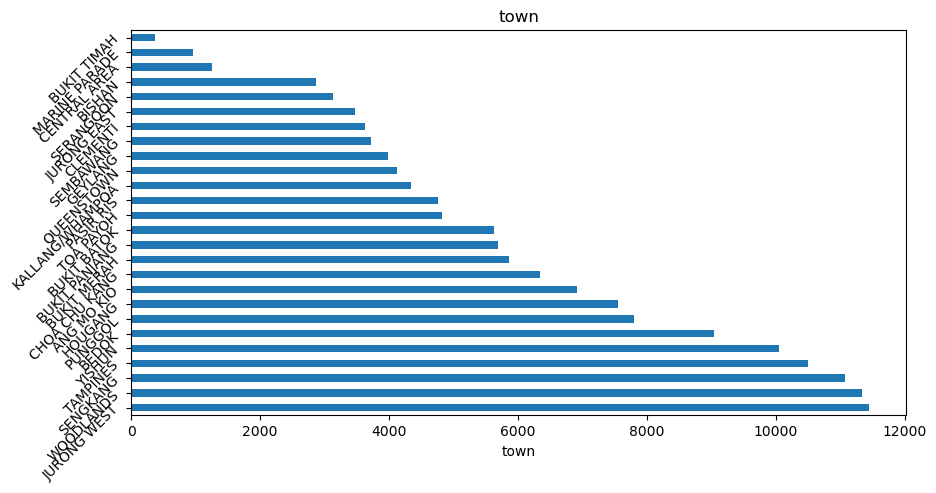

flat_type


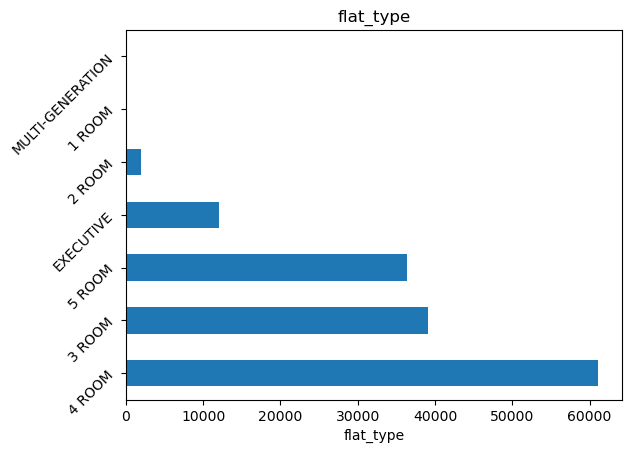

flat_model


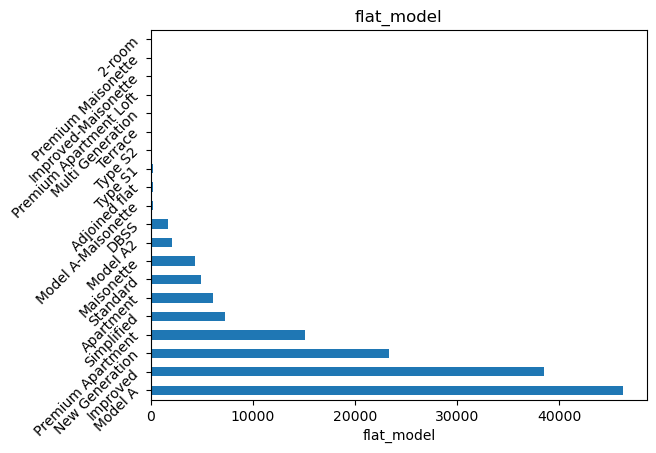

full_flat_type


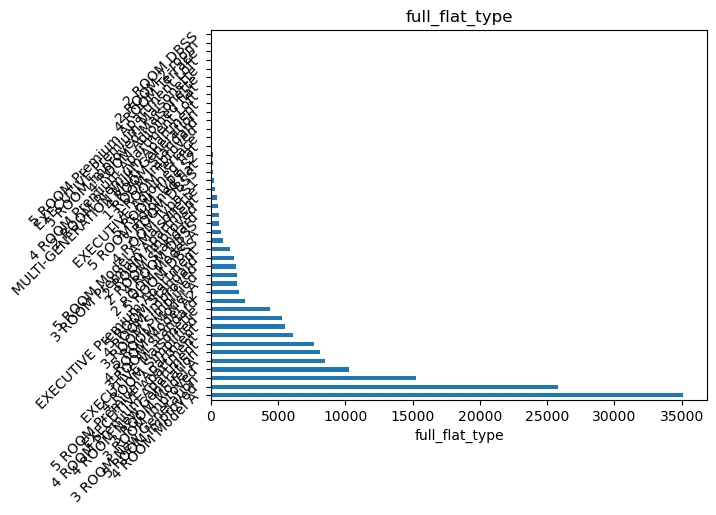

residential


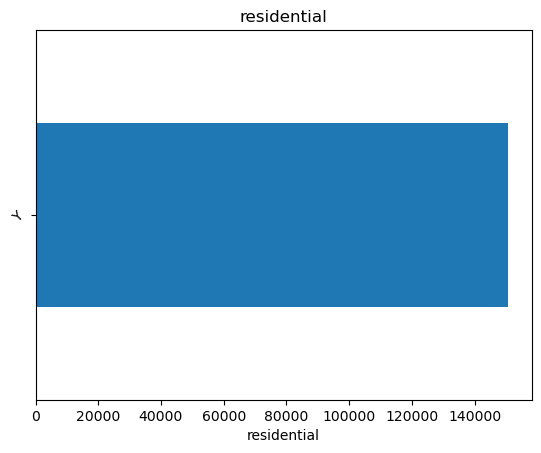

commercial


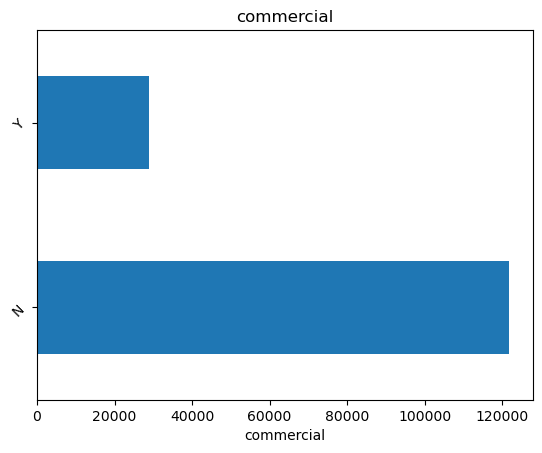

market_hawker


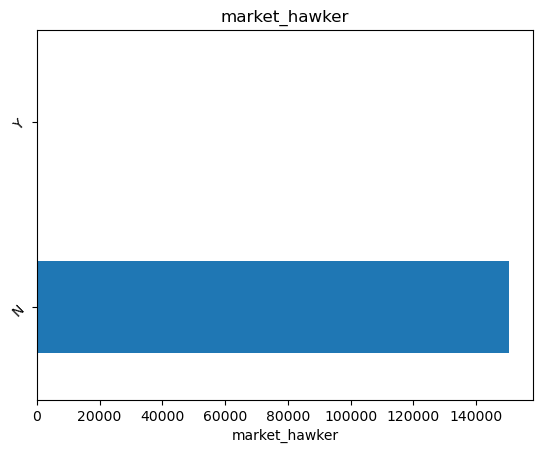

multistorey_carpark


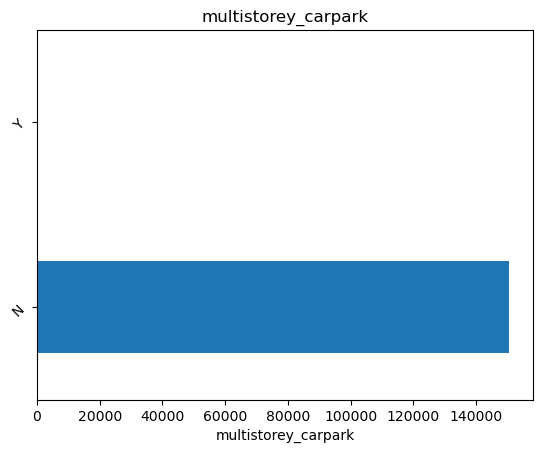

postal


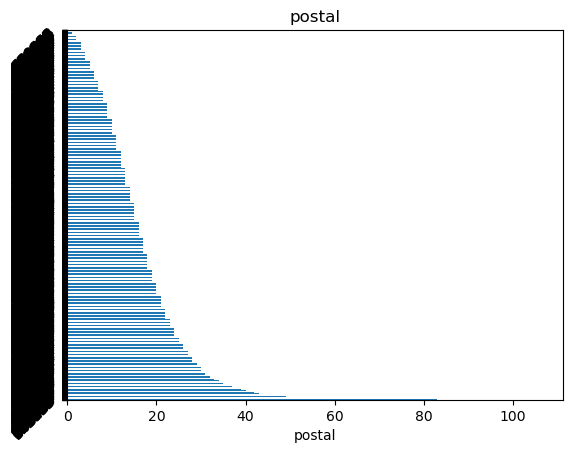

planning_area


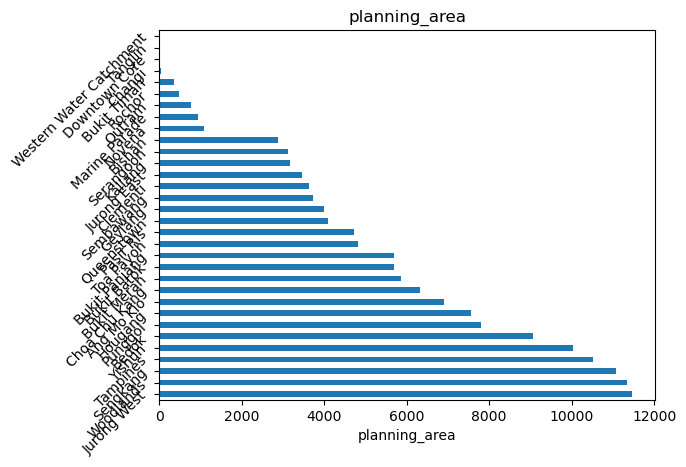

mrt_name


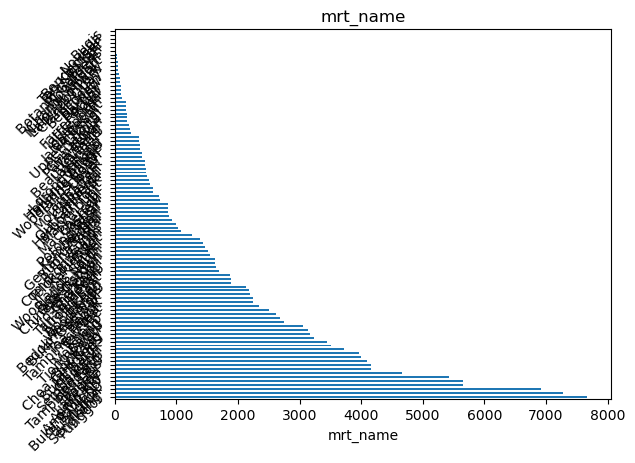

In [73]:
# Frequency plots for catergorical features
fig = plt.figure(figsize=(10,5))
for feature in categorical_features:
    df[feature].value_counts().plot.barh()
    print (feature)
    plt.xlabel(feature)
    plt.yticks(rotation=45)
    plt.title(feature)
    plt.show()

In [74]:
df['residential'].value_counts()

Y    150634
Name: residential, dtype: int64

In [75]:
df['market_hawker'].value_counts()

N    150619
Y        15
Name: market_hawker, dtype: int64

In [76]:
df['multistorey_carpark'].value_counts()

N    150592
Y        42
Name: multistorey_carpark, dtype: int64

In [77]:
# drop residential as it have only 1 value; there is no predictive power for these variables
# drop planning_area postal and mrt_name too, since we are going to represent it with town
# drop full_flat_type as there is flat_type and flat_model

df = df.drop(columns = ['residential', 'postal', 'mrt_name', 'full_flat_type', 'planning_area'])

In [78]:
df_pred = df_pred.drop(columns = ['residential', 'postal', 'mrt_name', 'full_flat_type', 'planning_area'])

In [79]:
# perform simple encoding; yes = 1, no = 0
df['commercial'] = df['commercial'].map({'Y': 1, 'N': 0})
df['market_hawker'] = df['market_hawker'].map({'Y': 1, 'N': 0})
df['multistorey_carpark'] = df['multistorey_carpark'].map({'Y': 1, 'N': 0})

In [80]:
# perform simple encoding on preds; yes = 1, no = 0
df_pred['commercial'] = df_pred['commercial'].map({'Y': 1, 'N': 0})
df_pred['market_hawker'] = df_pred['market_hawker'].map({'Y': 1, 'N': 0})
df_pred['multistorey_carpark'] = df_pred['multistorey_carpark'].map({'Y': 1, 'N': 0})

## 2. Re-categorize some variables
Reduce the amount of variables before one-hot encoding, to prevent overfitting with noise and avoid multicollinearity

In [81]:
df.head()

,Unnamed: 0,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,mid,hdb_age,year_completed,commercial,market_hawker,multistorey_carpark,total_dwelling_units,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,cutoff_point,remaining_lease_years
0,0,KALLANG/WHAMPOA,4 ROOM,90.0,Model A,2006,680000.0,2016,11,15,2005,0,0,0,142,1094.090418,154.753357,330.083069,29.427395,1138.633422,1138.633422,224,83
1,1,BISHAN,5 ROOM,130.0,Improved,1987,665000.0,2012,8,34,1987,0,0,0,112,866.941448,640.151925,903.659703,58.207761,415.607357,447.894399,232,64
2,2,BUKIT BATOK,EXECUTIVE,144.0,Apartment,1997,838000.0,2013,14,24,1996,0,0,0,90,1459.579948,1762.082341,1334.251197,214.747860,498.849039,180.074558,188,74
3,3,BISHAN,4 ROOM,103.0,Model A,1992,550000.0,2012,3,29,1990,1,0,0,75,950.175199,726.215262,907.453484,43.396521,389.515528,389.515528,253,69
4,4,YISHUN,4 ROOM,83.0,Simplified,1987,298000.0,2017,2,34,1987,0,0,0,48,729.771895,1540.151439,412.343032,129.422752,401.200584,312.025435,208,64


In [82]:
# Re-categorize flat model to reduce number of classes
new_flat_models = {'Executive Maisonette':'Maisonette', 'Terrace':'Special', 'Adjoined flat':'Special', 
                    'Type S1':'Special', 'Type S2':'Special', 'DBSS':'Special', 'Model A2':'Model A', 'Premium Apartment':'Apartment', 'Improved':'Standard', 'Simplified':'Model A', '2-room':'Standard'}
df = df.replace({'flat_model': new_flat_models})
df_pred = df_pred.replace({'flat_model': new_flat_models})

In [83]:
# To reduce the amount of one-hot encoding on flat_models, I will group them into 6 flat types. 

# Label encode flat_type
new_flat_type = {'MULTI-GENERATION':6, '1 ROOM': 5, '2 ROOM':4, '3 ROOM':3, '4 ROOM':0, '5 ROOM':1, 'EXECUTIVE':2}
df = df.replace({'flat_type': new_flat_type})
df_pred = df_pred.replace({'flat_type': new_flat_type})

In [84]:
df['flat_model'].nunique() # reduced to 13 from 20 unique features

11

In [85]:
df['flat_model'].nunique()

11

To reduce the amount of one-hot encoding on town, I will group them into 5 regions, taking reference from [the URA list of regions by towns](https://www.newlaunchesreview.com/regions-of-singapore/)

In [86]:
# find out the number of town
df['town'].unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

In [87]:
df['town'].nunique()

26

In [88]:
df_pred['town'].nunique()

26

In [89]:
# make town into regions in Singapore for train data

def sg_region(df):
    if df['town'] == 'BISHAN' or df['town'] == 'BUKIT MERAH' or df['town'] == 'GEYLANG' or df['town'] == 'KALLANG/WHAMPOA' or df['town'] == 'MARINE PARADE' or df['town'] == 'QUEENSTOWN' or df['town'] == 'TOA PAYOH' or df['town'] == 'BUKIT TIMAH' or df['town'] == 'CENTRAL AREA':
        return 'Central'
    elif df['town'] == 'BUKIT BATOK' or df['town'] == 'BUKIT PANJANG' or df['town'] == 'CHOA CHU KANG' or df['town']== 'JURONG WEST' or df['town'] == 'JURONG EAST' or df['town'] == 'CLEMENTI' :
        return 'West'
    elif df['town'] == 'BEDOK' or df['town'] == 'PASIR RIS' or df['town'] == 'TAMPINES':
        return 'East'
    elif df['town'] == 'ANG MO KIO' or df['town'] == 'HOUGANG' or df['town'] == 'PUNGGOL' or df['town'] == 'SENGKANG'or df['town'] == 'SERANGOON':
        return 'North East'
    elif df['town'] == 'SEMBAWANG' or df['town'] == 'WOODLANDS' or df['town'] == 'YISHUN':
        return 'North'

df['region'] = df.apply(sg_region, axis = 1)

In [90]:
# make town into regions in Singapore for test data

def sg_region_pred(df):
    if df_pred['town'] == 'BISHAN' or df_pred['town'] == 'BUKIT MERAH' or df_pred['town'] == 'GEYLANG' or df_pred['town'] == 'KALLANG/WHAMPOA' or df_pred['town'] == 'MARINE PARADE' or df_pred['town'] == 'QUEENSTOWN' or df_pred['town'] == 'TOA PAYOH' or df_pred['town'] == 'BUKIT TIMAH' or df_pred['town'] == 'CENTRAL AREA':
        return 'Central'
    elif df_pred['town'] == 'BUKIT BATOK' or df_pred['town'] == 'BUKIT PANJANG' or df_pred['town'] == 'CHOA CHU KANG' or df_pred['town']== 'JURONG WEST' or df_pred['town'] == 'JURONG EAST' or df_pred['town'] == 'CLEMENTI' :
        return 'West'
    elif df_pred['town'] == 'BEDOK' or df_pred['town'] == 'PASIR RIS' or df_pred['town'] == 'TAMPINES':
        return 'East'
    elif df_pred['town'] == 'ANG MO KIO' or df_pred['town'] == 'HOUGANG' or df_pred['town'] == 'PUNGGOL' or df_pred['town'] == 'SENGKANG'or df_pred['town'] == 'SERANGOON':
        return 'North East'
    elif df_pred['town'] == 'SEMBAWANG' or df_pred['town'] == 'WOODLANDS' or df_pred['town'] == 'YISHUN':
        return 'North'

df_pred['region'] = df_pred.apply(sg_region, axis = 1)

In [91]:
# check the number of regions
df['region'].nunique()

5

In [92]:
df_pred['region'].nunique()

5

In [93]:
# since i do not need town variable anymore, i will drop it

df.drop(columns = ['town'], inplace=True)
df_pred.drop(columns = ['town'], inplace=True)

## 3. Perform one-hot encoding on categorical variable

In [94]:
# do one-hot encoding for region
df = pd.get_dummies(df, columns=['region'], prefix=['region'], drop_first=True) # central area as the baseline

In [95]:
df_pred = pd.get_dummies(df_pred, columns=['region'], prefix=['region'], drop_first=True) # same for prediction data

In [96]:
# do one-hot encoding on flat_mode, using Standard as a baseline
df = pd.get_dummies(df, columns=['flat_model'], prefix=['model'])
df= df.drop('model_Standard',axis=1) # remove standard, setting it as the baseline

In [97]:
# do one-hot encoding on flat_mode, using Standard as a baseline
df_pred = pd.get_dummies(df_pred, columns=['flat_model'], prefix=['model'])
df_pred= df_pred.drop('model_Standard',axis=1) # remove standard, setting it as the baseline

## 4. Introduce interaction term
This is introduced to find out the tier of the secondary school, which depends on the cutoff point. The assumption is that higher tier secondary school is more in demand. HDB flats that are closer to such schools might be of higher demand, as shown from the reaction [of the move of ACS to Tengah area](https://www.straitstimes.com/singapore/housing/acs-primary-relocation-likely-to-boost-future-tengah-bto-application-rates-interest-in-bukit-batok-ecs-analysts) 

In [98]:
df['sec_cutoff'] = df['sec_sch_nearest_dist'] * df['cutoff_point']

In [99]:
df_pred['sec_cutoff'] = df_pred['sec_sch_nearest_dist'] * df_pred['cutoff_point']

In [100]:
# check if the interaction term is introduced for train data
df.head()

,Unnamed: 0,flat_type,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,mid,hdb_age,year_completed,commercial,market_hawker,multistorey_carpark,total_dwelling_units,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,cutoff_point,remaining_lease_years,region_East,region_North,region_North East,region_West,model_Apartment,model_Improved-Maisonette,model_Maisonette,model_Model A,model_Model A-Maisonette,model_Multi Generation,model_New Generation,model_Premium Apartment Loft,model_Premium Maisonette,model_Special,sec_cutoff
0,0,0,90.0,2006,680000.0,2016,11,15,2005,0,0,0,142,1094.090418,154.753357,330.083069,29.427395,1138.633422,1138.633422,224,83,0,0,0,0,0,0,0,1,0,0,0,0,0,0,255053.886435
1,1,1,130.0,1987,665000.0,2012,8,34,1987,0,0,0,112,866.941448,640.151925,903.659703,58.207761,415.607357,447.894399,232,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103911.500629
2,2,2,144.0,1997,838000.0,2013,14,24,1996,0,0,0,90,1459.579948,1762.082341,1334.251197,214.747860,498.849039,180.074558,188,74,0,0,0,1,1,0,0,0,0,0,0,0,0,0,33854.016862
3,3,0,103.0,1992,550000.0,2012,3,29,1990,1,0,0,75,950.175199,726.215262,907.453484,43.396521,389.515528,389.515528,253,69,0,0,0,0,0,0,0,1,0,0,0,0,0,0,98547.428522
4,4,0,83.0,1987,298000.0,2017,2,34,1987,0,0,0,48,729.771895,1540.151439,412.343032,129.422752,401.200584,312.025435,208,64,0,1,0,0,0,0,0,1,0,0,0,0,0,0,64901.290400


In [101]:
# check if the interaction term is introduced for test data
df_pred.head()

,Unnamed: 0,id,flat_type,floor_area_sqm,lease_commence_date,Tranc_Year,mid,hdb_age,year_completed,commercial,market_hawker,multistorey_carpark,total_dwelling_units,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,cutoff_point,remaining_lease_years,region_East,region_North,region_North East,region_West,model_Apartment,model_Improved-Maisonette,model_Maisonette,model_Model A,model_Model A-Maisonette,model_Multi Generation,model_New Generation,model_Premium Apartment Loft,model_Premium Maisonette,model_Special,sec_cutoff
0,0,114982,0,84.0,1987,2012,8,34,1986,1,0,0,132,877.431572,687.576779,686.660434,75.683952,426.467910,156.322353,218,64,0,1,0,0,0,0,0,1,0,0,0,0,0,0,34078.273019
1,1,95653,1,112.0,2008,2019,5,13,2002,0,0,0,53,534.037705,2122.346226,169.478175,88.993058,439.756851,739.371688,199,85,0,0,0,1,1,0,0,0,0,0,0,0,0,0,147134.965932
2,2,40303,3,68.0,1980,2013,8,41,1979,0,0,0,218,817.050453,152.287621,694.220448,86.303575,355.882207,305.071191,245,57,0,0,1,0,0,0,0,0,0,0,1,0,0,0,74742.441795
3,3,109506,0,97.0,1979,2017,2,42,1976,0,0,0,104,1272.737194,501.892158,1117.203587,108.459039,929.744711,433.454591,188,56,0,1,0,0,0,0,0,0,0,0,1,0,0,0,81489.463089
4,4,100149,0,103.0,1985,2016,17,36,1985,0,0,0,144,1070.963675,437.593564,987.976010,113.645431,309.926934,217.295361,223,62,0,0,0,1,0,0,0,1,0,0,0,0,0,0,48456.865525


## 5. Perform suitable scaling on predicted value (resale_price)
Check the distribution of y-variable. From the EDA section earlier, I saw that there's outliers for this variables. 

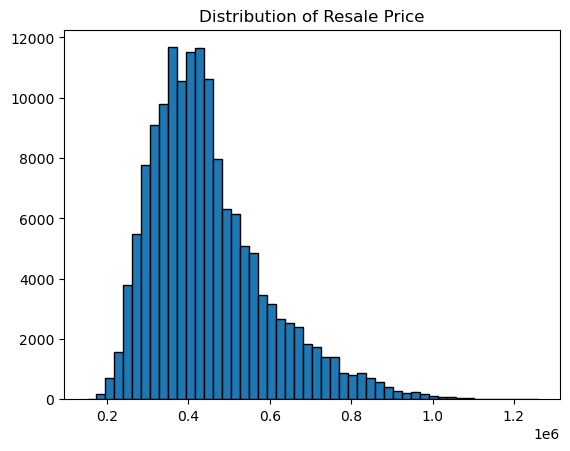

In [102]:
# check the distribution of resale_price
plt.hist(df['resale_price'], bins=50, edgecolor='black')
plt.title('Distribution of Resale Price')
plt.show()

**Observation**: The distribution of y-variable, resale_price, is not normal. I will transform the data to a log scale to make it into a normal distribution

In [103]:
# transform resale_price with logarithmic transformation
df['resale_price']=np.log(df['resale_price'])

Text(0.5, 1.0, 'Distribution of Resale Price')

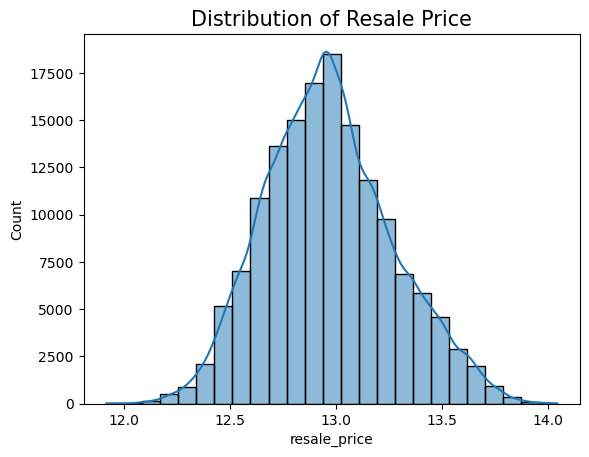

In [104]:
# find out the distribution of resale_price

sns.histplot(data=df, x='resale_price', bins =25, kde=True)
plt.title('Distribution of Resale Price', fontsize=15)

# after transforming the variable, the distribution becomes normal

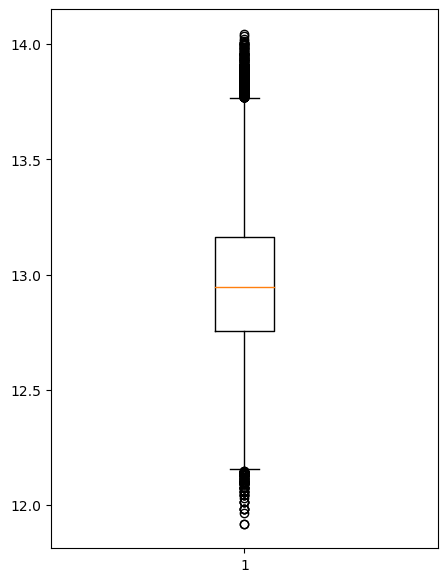

In [105]:
# examine the outliers after log-transformation

# plot a boxplot of resale_price data: 
plt.figure(figsize = (5,7))
bp = plt.boxplot(data=df, x='resale_price')

**Observations**: There are still outliers, but the impact on the tail is reduced as compared to the original scale.
The outliers may contain information about the data. I will keep them in for analysis later

In [106]:
# save files into .csv for the next stage (modelling)

In [107]:
df.head()

,Unnamed: 0,flat_type,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,mid,hdb_age,year_completed,commercial,market_hawker,multistorey_carpark,total_dwelling_units,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,cutoff_point,remaining_lease_years,region_East,region_North,region_North East,region_West,model_Apartment,model_Improved-Maisonette,model_Maisonette,model_Model A,model_Model A-Maisonette,model_Multi Generation,model_New Generation,model_Premium Apartment Loft,model_Premium Maisonette,model_Special,sec_cutoff
0,0,0,90.0,2006,13.429848,2016,11,15,2005,0,0,0,142,1094.090418,154.753357,330.083069,29.427395,1138.633422,1138.633422,224,83,0,0,0,0,0,0,0,1,0,0,0,0,0,0,255053.886435
1,1,1,130.0,1987,13.407542,2012,8,34,1987,0,0,0,112,866.941448,640.151925,903.659703,58.207761,415.607357,447.894399,232,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103911.500629
2,2,2,144.0,1997,13.638773,2013,14,24,1996,0,0,0,90,1459.579948,1762.082341,1334.251197,214.747860,498.849039,180.074558,188,74,0,0,0,1,1,0,0,0,0,0,0,0,0,0,33854.016862
3,3,0,103.0,1992,13.217674,2012,3,29,1990,1,0,0,75,950.175199,726.215262,907.453484,43.396521,389.515528,389.515528,253,69,0,0,0,0,0,0,0,1,0,0,0,0,0,0,98547.428522
4,4,0,83.0,1987,12.604849,2017,2,34,1987,0,0,0,48,729.771895,1540.151439,412.343032,129.422752,401.200584,312.025435,208,64,0,1,0,0,0,0,0,1,0,0,0,0,0,0,64901.290400


In [108]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [109]:
# save it to the csv file
df.to_csv('./datasets/preprocessed_train_data.csv', index=False)

In [110]:
df.head()

,flat_type,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,mid,hdb_age,year_completed,commercial,market_hawker,multistorey_carpark,total_dwelling_units,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,cutoff_point,remaining_lease_years,region_East,region_North,region_North East,region_West,model_Apartment,model_Improved-Maisonette,model_Maisonette,model_Model A,model_Model A-Maisonette,model_Multi Generation,model_New Generation,model_Premium Apartment Loft,model_Premium Maisonette,model_Special,sec_cutoff
0,0,90.0,2006,13.429848,2016,11,15,2005,0,0,0,142,1094.090418,154.753357,330.083069,29.427395,1138.633422,1138.633422,224,83,0,0,0,0,0,0,0,1,0,0,0,0,0,0,255053.886435
1,1,130.0,1987,13.407542,2012,8,34,1987,0,0,0,112,866.941448,640.151925,903.659703,58.207761,415.607357,447.894399,232,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103911.500629
2,2,144.0,1997,13.638773,2013,14,24,1996,0,0,0,90,1459.579948,1762.082341,1334.251197,214.747860,498.849039,180.074558,188,74,0,0,0,1,1,0,0,0,0,0,0,0,0,0,33854.016862
3,0,103.0,1992,13.217674,2012,3,29,1990,1,0,0,75,950.175199,726.215262,907.453484,43.396521,389.515528,389.515528,253,69,0,0,0,0,0,0,0,1,0,0,0,0,0,0,98547.428522
4,0,83.0,1987,12.604849,2017,2,34,1987,0,0,0,48,729.771895,1540.151439,412.343032,129.422752,401.200584,312.025435,208,64,0,1,0,0,0,0,0,1,0,0,0,0,0,0,64901.290400


In [111]:
df_pred.head()

,Unnamed: 0,id,flat_type,floor_area_sqm,lease_commence_date,Tranc_Year,mid,hdb_age,year_completed,commercial,market_hawker,multistorey_carpark,total_dwelling_units,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,cutoff_point,remaining_lease_years,region_East,region_North,region_North East,region_West,model_Apartment,model_Improved-Maisonette,model_Maisonette,model_Model A,model_Model A-Maisonette,model_Multi Generation,model_New Generation,model_Premium Apartment Loft,model_Premium Maisonette,model_Special,sec_cutoff
0,0,114982,0,84.0,1987,2012,8,34,1986,1,0,0,132,877.431572,687.576779,686.660434,75.683952,426.467910,156.322353,218,64,0,1,0,0,0,0,0,1,0,0,0,0,0,0,34078.273019
1,1,95653,1,112.0,2008,2019,5,13,2002,0,0,0,53,534.037705,2122.346226,169.478175,88.993058,439.756851,739.371688,199,85,0,0,0,1,1,0,0,0,0,0,0,0,0,0,147134.965932
2,2,40303,3,68.0,1980,2013,8,41,1979,0,0,0,218,817.050453,152.287621,694.220448,86.303575,355.882207,305.071191,245,57,0,0,1,0,0,0,0,0,0,0,1,0,0,0,74742.441795
3,3,109506,0,97.0,1979,2017,2,42,1976,0,0,0,104,1272.737194,501.892158,1117.203587,108.459039,929.744711,433.454591,188,56,0,1,0,0,0,0,0,0,0,0,1,0,0,0,81489.463089
4,4,100149,0,103.0,1985,2016,17,36,1985,0,0,0,144,1070.963675,437.593564,987.976010,113.645431,309.926934,217.295361,223,62,0,0,0,1,0,0,0,1,0,0,0,0,0,0,48456.865525


In [112]:
df_pred.drop(columns = ['Unnamed: 0'], inplace=True)

In [113]:
df_pred.to_csv('./datasets/preprocessed_test_data.csv', index=False)

In [114]:
df_pred.head()

,id,flat_type,floor_area_sqm,lease_commence_date,Tranc_Year,mid,hdb_age,year_completed,commercial,market_hawker,multistorey_carpark,total_dwelling_units,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,cutoff_point,remaining_lease_years,region_East,region_North,region_North East,region_West,model_Apartment,model_Improved-Maisonette,model_Maisonette,model_Model A,model_Model A-Maisonette,model_Multi Generation,model_New Generation,model_Premium Apartment Loft,model_Premium Maisonette,model_Special,sec_cutoff
0,114982,0,84.0,1987,2012,8,34,1986,1,0,0,132,877.431572,687.576779,686.660434,75.683952,426.467910,156.322353,218,64,0,1,0,0,0,0,0,1,0,0,0,0,0,0,34078.273019
1,95653,1,112.0,2008,2019,5,13,2002,0,0,0,53,534.037705,2122.346226,169.478175,88.993058,439.756851,739.371688,199,85,0,0,0,1,1,0,0,0,0,0,0,0,0,0,147134.965932
2,40303,3,68.0,1980,2013,8,41,1979,0,0,0,218,817.050453,152.287621,694.220448,86.303575,355.882207,305.071191,245,57,0,0,1,0,0,0,0,0,0,0,1,0,0,0,74742.441795
3,109506,0,97.0,1979,2017,2,42,1976,0,0,0,104,1272.737194,501.892158,1117.203587,108.459039,929.744711,433.454591,188,56,0,1,0,0,0,0,0,0,0,0,1,0,0,0,81489.463089
4,100149,0,103.0,1985,2016,17,36,1985,0,0,0,144,1070.963675,437.593564,987.976010,113.645431,309.926934,217.295361,223,62,0,0,0,1,0,0,0,1,0,0,0,0,0,0,48456.865525
